# Zerobond yields from EURIbor Index Swaps

In [19]:
# import the used libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import QuantLib as ql
import BootStrapping as bs
import MarketData as md
import ReadExcel
import math
import re
import time
import refinitiv.data as rd
 
%matplotlib inline

In [20]:
# Setting evaluation date
today = ql.Date.todaysDate()
today = ql.TARGET().adjust(today,ql.Following)
ql.Settings.instance().setEvaluationDate(today)

# Market quotes

In [27]:

session = rd.session.desktop.Definition(app_key='256eae2f881c499095090ac71dc96aa92cc6cb90').get_session()
session.open()
rd.session.set_default(session)
 
EURAB3EIRS_chain = rd.content.pricing.chain.Definition(name='EURAB3EIRS=').get_stream()
EURAB3EIRS_chain.open(False)
print('EURAB3EIRS= constituents :', EURAB3EIRS_chain.constituents)
 
euro = rd.get_data(universe=EURAB3EIRS_chain.constituents, fields=['GV4_TEXT', 'MATUR_DATE', 'PRIMACT_1', 'SEC_ACT_1'])
print(euro)

EURAB3EIRS= constituents : ['EURAB3E6M=', 'EURAB3E9M=', 'EURAB3E1Y=', 'EURAB3E18M=', 'EURAB3E2Y=', 'EURAB3E3Y=', 'EURAB3E4Y=', 'EURAB3E5Y=', 'EURAB3E6Y=', 'EURAB3E7Y=', 'EURAB3E8Y=', 'EURAB3E9Y=', 'EURAB3E10Y=', 'EURAB3E11Y=', 'EURAB3E12Y=', 'EURAB3E13Y=', 'EURAB3E14Y=', 'EURAB3E15Y=', 'EURAB3E16Y=', 'EURAB3E17Y=', 'EURAB3E18Y=', 'EURAB3E19Y=', 'EURAB3E20Y=', 'EURAB3E25Y=', 'EURAB3E30Y=', 'EURAB3E40Y=', 'EURAB3E50Y=']
     Instrument GV4_TEXT MATUR_DATE  PRIMACT_1  SEC_ACT_1
0    EURAB3E6M=   6M     2024-03-28      4.044      4.064
1    EURAB3E9M=   9M     2024-06-28      4.061      4.081
2    EURAB3E1Y=   1Y     2024-09-30       4.04       4.05
3   EURAB3E18M=   18M    2025-03-31      3.858      3.878
4    EURAB3E2Y=   2Y     2025-09-29     3.7155     3.7205
5    EURAB3E3Y=   3Y     2026-09-29      3.473      3.513
6    EURAB3E4Y=   4Y     2027-09-29      3.366      3.376
7    EURAB3E5Y=   5Y     2028-09-29      3.309      3.314
8    EURAB3E6Y=   6Y     2029-09-28      3.278      3.28

[OMMSTREAMING_CHAINS_1.1] on_ws_error: Exception: [WinError 10054] An existing connection was forcibly closed by the remote host
[OMMSTREAMING_CHAINS_2.2] on_ws_error: Exception: [WinError 10054] An existing connection was forcibly closed by the remote host
[OMMSTREAMING_CHAINS_0.0] on_ws_error: Exception: [WinError 10054] An existing connection was forcibly closed by the remote host
[OMMSTREAMING_CHAINS_5.5] on_ws_error: Exception: [WinError 10054] An existing connection was forcibly closed by the remote host
[OMMSTREAMING_CHAINS_4.4] on_ws_error: Exception: [WinError 10054] An existing connection was forcibly closed by the remote host
[OMMSTREAMING_CHAINS_3.3] on_ws_error: Exception: [WinError 10054] An existing connection was forcibly closed by the remote host
[OMMSTREAMING_CHAINS_2.2] on_ws_error: Exception: [WinError 10061] No connection could be made because the target machine actively refused it
[OMMSTREAMING_CHAINS_1.1] on_ws_error: Exception: [WinError 10061] No connection cou

In [7]:
mdata.depoQuotesDF['YearFrac'] = md.get_year_frac(today,mdata.depoQuotesDF['Maturity'],ql.ModifiedFollowing)
mdata.depoQuotesDF

,Maturity,Rate,YearFrac
0,1D,-0.00057,0.002778


In [6]:
mdata.oiSwapQuotesDF['YearFrac'] = md.get_year_frac(today,mdata.oiSwapQuotesDF['Maturity'],ql.ModifiedFollowing)
mdata.oiSwapQuotesDF

,Maturity,Rate,YearFrac
0,1W,-0.000560,0.019444
1,2W,-0.000558,0.038889
2,1M,-0.000630,0.083333
3,2M,-0.000730,0.175000
4,3M,-0.000810,0.252778
5,4M,-0.000870,0.338889
6,5M,-0.000930,0.427778
7,6M,-0.001000,0.505556
8,7M,-0.001040,0.591667
9,8M,-0.001080,0.680556


<Axes: xlabel='YearFrac'>

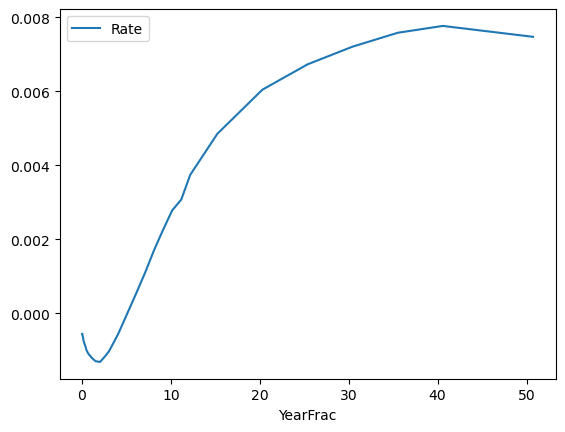

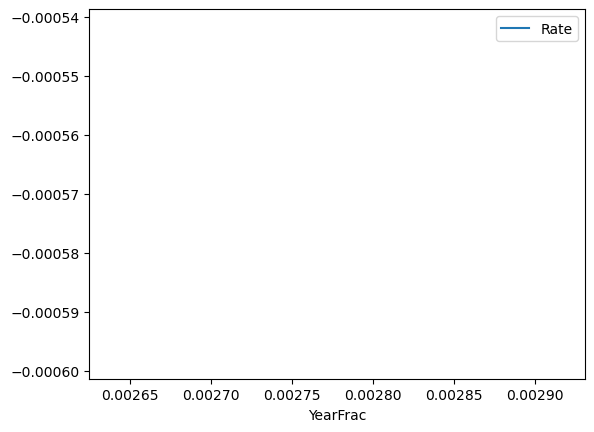

In [25]:
mdata.oiSwapQuotesDF[['YearFrac','Rate']].set_index('YearFrac').plot()
mdata.depoQuotesDF[['YearFrac','Rate']].set_index('YearFrac').plot()

# Bootstrap zero yields from depo and OISwap

In [10]:
oisZeroYields = bs.BootstrapOIS(mdata,mc)
discountTermStructure = ql.RelinkableYieldTermStructureHandle()
discountTermStructure.linkTo(oisZeroYields)
forecastTermStructure = ql.RelinkableYieldTermStructureHandle()
forecastTermStructure.linkTo(oisZeroYields)
# swaps to be priced

swapEngine = ql.DiscountingSwapEngine(discountTermStructure)
def priceOISwap(numTermUnits,termUnit,index,mc):
    nominal = 1000000
    settlementDate = mc.calendar.advance(ql.Settings.instance().evaluationDate,mc.settlementDays,
                                        ql.Days,mc.floatingEoniaConvention)
    maturity = mc.calendar.advance(settlementDate,numTermUnits,termUnit,mc.fixedEoniaConvention)
    
  
    fixedLegAdjustment = mc.fixedEoniaConvention
    fixedLegDayCounter = mc.fixedEoniaDayCount
    fixedLegTenor = ql.Period(1,ql.Years)
    fixedRate = 0.0
  
    spread = 0.0    
    floatingLegAdjustment = mc.floatingEoniaConvention
    floatingLegDayCounter = mc.floatingEoniaDayCount
    floatingLegTenor = ql.Period(1,ql.Years)
   
    fixedSchedule = ql.Schedule(settlementDate, maturity,
                             fixedLegTenor, mc.calendar,
                             fixedLegAdjustment, fixedLegAdjustment,
                             ql.DateGeneration.Forward, False)
    floatingSchedule = ql.Schedule(settlementDate, maturity,
                                floatingLegTenor, mc.calendar,
                                floatingLegAdjustment, floatingLegAdjustment,
                                ql.DateGeneration.Forward, False)

    spot = ql.VanillaSwap(ql.VanillaSwap.Payer, nominal,
                       fixedSchedule, fixedRate, fixedLegDayCounter,
                       floatingSchedule, index, spread,
                       floatingLegDayCounter)
    spot.setPricingEngine(swapEngine)
    return spot.NPV(),spot.fairRate(),spot.fairSpread()




## Roundtrip recover quoted par rates from zeroyields

In [11]:
oindex = ql.Eonia(forecastTermStructure)
for item in sorted (mdata.oiSwapQuotes, key = lambda item : ql.Period(item.numTimeUnits,item.timeUnit)):
    print("Market: " + md.printOISwapDatum(item,4)
    + ";Model: " + md.formatRate(priceOISwap(item.numTimeUnits,item.timeUnit,oindex,mc)[1],4)
    + ";Error: " + md.formatRate(item.rate-priceOISwap(item.numTimeUnits,item.timeUnit,oindex,mc)[1],4))

Market: Maturity: 1W	Quoted Rate:-0.0560 %;Model: -0.0560 %;Error: -0.0000 %
Market: Maturity: 2W	Quoted Rate:-0.0558 %;Model: -0.0557 %;Error: -0.0000 %
Market: Maturity: 1M	Quoted Rate:-0.0630 %;Model: -0.0630 %;Error: -0.0000 %
Market: Maturity: 2M	Quoted Rate:-0.0730 %;Model: -0.0730 %;Error: 0.0000 %
Market: Maturity: 3M	Quoted Rate:-0.0810 %;Model: -0.0810 %;Error: -0.0000 %
Market: Maturity: 4M	Quoted Rate:-0.0870 %;Model: -0.0870 %;Error: 0.0000 %
Market: Maturity: 5M	Quoted Rate:-0.0930 %;Model: -0.0930 %;Error: -0.0000 %
Market: Maturity: 6M	Quoted Rate:-0.1000 %;Model: -0.1000 %;Error: -0.0000 %
Market: Maturity: 7M	Quoted Rate:-0.1040 %;Model: -0.1040 %;Error: 0.0000 %
Market: Maturity: 8M	Quoted Rate:-0.1080 %;Model: -0.1080 %;Error: -0.0000 %
Market: Maturity: 9M	Quoted Rate:-0.1110 %;Model: -0.1110 %;Error: -0.0000 %
Market: Maturity: 10M	Quoted Rate:-0.1140 %;Model: -0.1140 %;Error: 0.0000 %
Market: Maturity: 11M	Quoted Rate:-0.1150 %;Model: -0.1150 %;Error: 0.0000 %
Ma

C:\Users\fhoefer\AppData\Local\Temp\ipykernel_17092\1622513337.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(yearFracsOIS, [priceOISwap(item.numTimeUnits,item.timeUnit,oindex,mc)[1] for item in mdata.oiSwapQuotes],'k', label='OISwap Par Rate from zero yield',color ='red')
C:\Users\fhoefer\AppData\Local\Temp\ipykernel_17092\1622513337.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(yearFracsOIS, [- math.log(oisZeroYields.discount(yf, True))/yf for yf in yearFracsOIS] ,'k', label='Zero yields from OISwap quotes',color ='blue')


Text(0.5, 1.0, ' ')

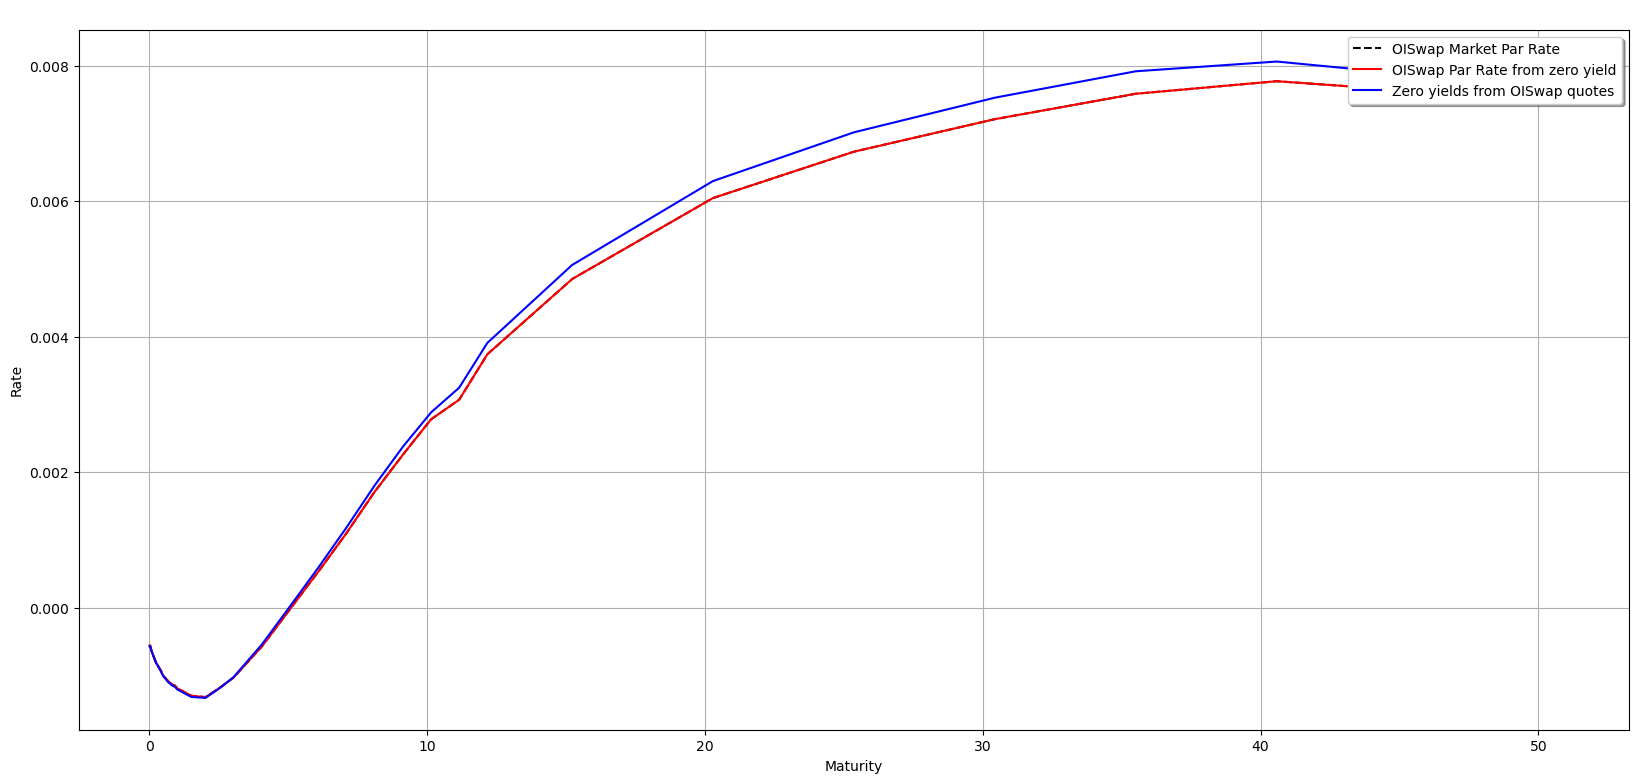

In [13]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(211)
ax.grid(True)

yearFracsOIS = [ql.Actual360().yearFraction(today,mat) 
             for mat in [ ql.TARGET().adjust(today + x, ql.Following) 
             for x in [ql.Period(item.numTimeUnits,item.timeUnit) 
             for item in mdata.oiSwapQuotes]]]

yearFracsOIS = md.get_year_frac(today, mdata.oiSwapQuotesDF['Maturity'],ql.ModifiedFollowing)

ax.plot(yearFracsOIS, [item.rate for item in mdata.oiSwapQuotes],'k--', label='OISwap Market Par Rate')
ax.plot(yearFracsOIS, [priceOISwap(item.numTimeUnits,item.timeUnit,oindex,mc)[1] for item in mdata.oiSwapQuotes],'k', label='OISwap Par Rate from zero yield',color ='red')
ax.plot(yearFracsOIS, [- math.log(oisZeroYields.discount(yf, True))/yf for yf in yearFracsOIS] ,'k', label='Zero yields from OISwap quotes',color ='blue')
ax.set_xlabel('Maturity') 
ax.set_ylabel('Rate')
legend = ax.legend(loc='upper right', shadow=True)
ax.set_title(" ", fontdict=None, loc=u'center')

# Compate discountfactors from BB with Quantlib

In [16]:


wb = openpyxl.load_workbook("CurvesfromBB/EUR.OIS.xlsx")
ws = wb.get_sheet_by_name('BView DC (linear_s)')
bblist = ReadExcel.get_list_from_cols(['Term','Df.Mid'],ws) 
bbzeroyield = []

for item in bblist:      
            numSettlementDays =0
            matchResult = re.match("([0-9]{1,2}) ([a-zA-Z][a-zA-Z])", item['Term'], flags=0)
            if(matchResult):
                timeUnit = md.map_BBtenor_to_quantlib(matchResult.group(2))
                numTimeUnits = int(matchResult.group(1))
                rate = item['Df.Mid']*100
                bbzeroyield.append(md.Datum(numSettlementDays,timeUnit,numTimeUnits,rate/100))
            else:
                print("Could not parse " + item['InstType'] + ' ' + 'Term' + ": " +item['Term'] )

yfData =[]
dfData=[]
error =[]
for item in sorted (mdata.oiSwapQuotes, key = lambda item : ql.Period(item.numTimeUnits,item.timeUnit)):
       term = md.printOISwapDatum(item,4)
       yf = ql.Actual360().yearFraction(today,ql.TARGET().adjust(today + ql.Period(item.numTimeUnits,item.timeUnit), ql.Following)) 
       yfData.append(yf)
       df = [bbitem.rate for bbitem in bbzeroyield if ((item.numTimeUnits == bbitem.numTimeUnits)&(item.timeUnit == bbitem.timeUnit))][0]
       dfData.append(df)
       err = df - oisZeroYields.discount(yf, True)
       error.append(err)
       print("Market: " + term + ':  ')
       print("   Discount Factor:    " + str(oisZeroYields.discount(yf, True)))       
       print("   BB Discount Factor: " + str(df))
       print("   Error: " + str(err))

Market: Maturity: 1W	Quoted Rate:-0.0560 %:  
   Discount Factor:    1.0000110680153766
   BB Discount Factor: 1.000011
   Error: -6.801537666412116e-08
Market: Maturity: 2W	Quoted Rate:-0.0558 %:  
   Discount Factor:    1.0000220363218448
   BB Discount Factor: 1.000028
   Error: 5.963678155085361e-06
Market: Maturity: 1M	Quoted Rate:-0.0630 %:  
   Discount Factor:    1.0000525917056997
   BB Discount Factor: 1.000054
   Error: 1.408294300286883e-06
Market: Maturity: 2M	Quoted Rate:-0.0730 %:  
   Discount Factor:    1.0001292138499118
   BB Discount Factor: 1.000124
   Error: -5.213849911811508e-06
Market: Maturity: 3M	Quoted Rate:-0.0810 %:  
   Discount Factor:    1.0002059418760325
   BB Discount Factor: 1.000212
   Error: 6.058123967589424e-06
Market: Maturity: 4M	Quoted Rate:-0.0870 %:  
   Discount Factor:    1.0002962612948232
   BB Discount Factor: 1.000295
   Error: -1.2612948232515464e-06
Market: Maturity: 5M	Quoted Rate:-0.0930 %:  
   Discount Factor:    1.0004028820408

C:\Users\fhoefer\AppData\Local\Temp\ipykernel_17092\1897889392.py:8: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  ws = wb.get_sheet_by_name('BView DC (linear_s)')


C:\Users\fhoefer\AppData\Local\Temp\ipykernel_17092\2829573211.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(yfData, dfData,'k--', label='BB Discount Factors', color ='green')
C:\Users\fhoefer\AppData\Local\Temp\ipykernel_17092\2829573211.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax2.plot(yfData, [oisZeroYields.discount(yf, True) for yf in yfData] ,'k', label='QuantLib Discount Factors',color ='blue')


Text(0.5, 1.0, ' ')

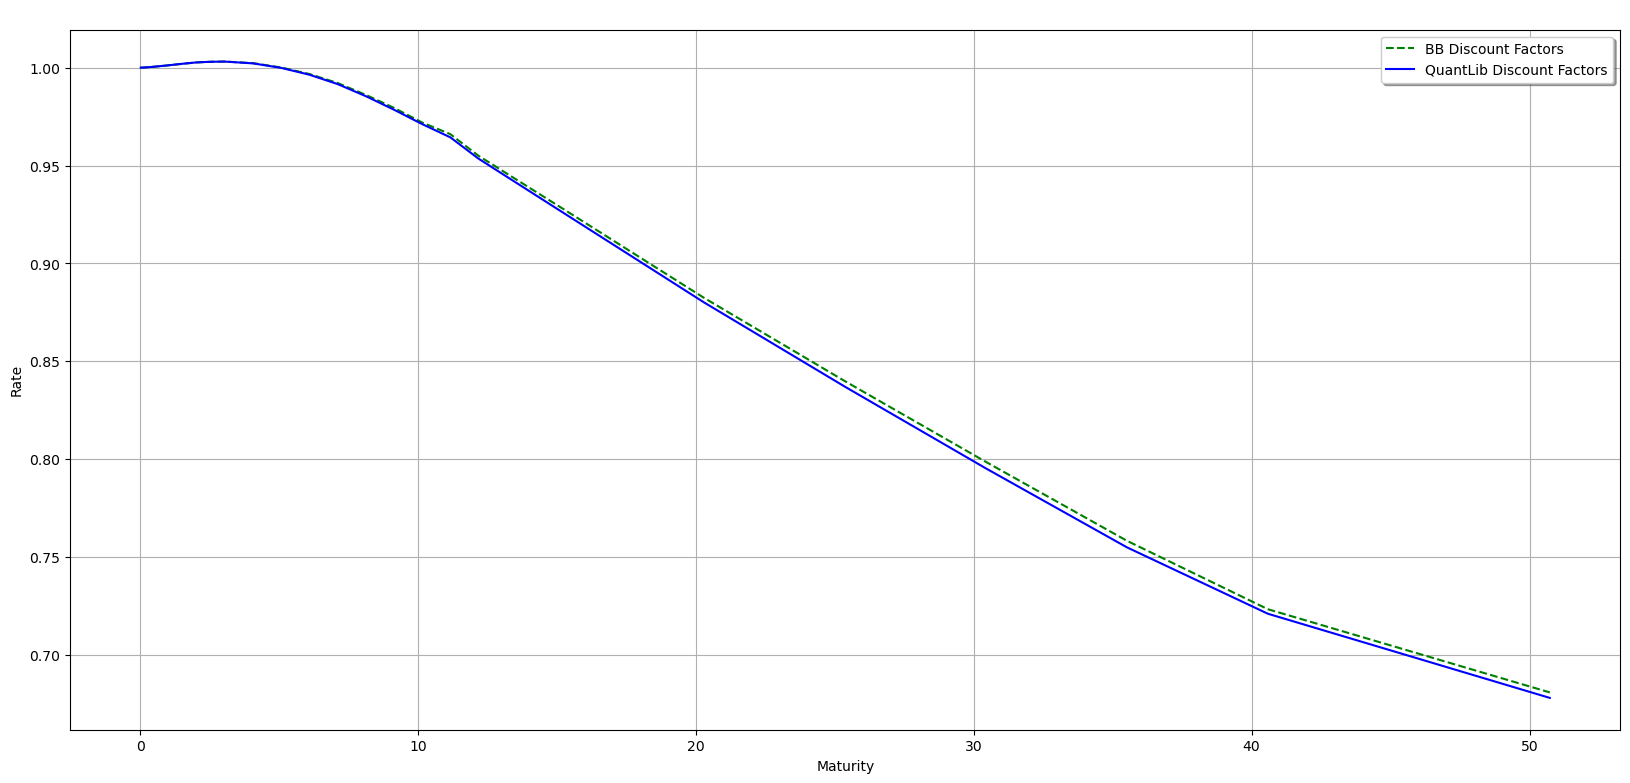

In [17]:
fig2 = plt.figure(figsize=(20,20))
ax2 = fig2.add_subplot(211)
ax2.grid(True)

yearFracsOIS = [ql.Actual360().yearFraction(today,mat) 
             for mat in [ ql.TARGET().adjust(today + x, ql.Following) 
             for x in [ql.Period(item.numTimeUnits,item.timeUnit) 
             for item in mdata.oiSwapQuotes]]]

ax2.plot(yfData, dfData,'k--', label='BB Discount Factors', color ='green')
ax2.plot(yfData, [oisZeroYields.discount(yf, True) for yf in yfData] ,'k', label='QuantLib Discount Factors',color ='blue')
ax2.set_xlabel('Maturity') 
ax2.set_ylabel('Rate')
legend = ax2.legend(loc='upper right', shadow=True)
ax2.set_title(" ", fontdict=None, loc=u'center')